# Make your own artificial intelligence model


###### (Model adapted from [Keras](https://keras.io/examples/vision/image_classification_from_scratch/) and [Tensorflow](https://www.tensorflow.org/tutorials/images/classification).)

Make sure that you "run" each of the "cells". The runnable "cells" are the boxes that have the play button image.pngon the top left. To "run" a cell, click on the play button.

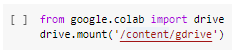

Side note:
>   When you hover over the set of brackets, the brackets will turn into a play button.image.png Click on the button to run the cell. When you click, the button will soon turn into a stop button.image.png Click on this button to stop the cell from running.

You should run all of the cells in the order that they are in.

If you are interested in learning and understanding the code or other information, please refer to the [Guide](https://) tab on the website for more information.

## Connect to Google Drive
Before we get into the fun, we need to have a place containing many pictures of cats and dogs. With [Google Colaboratory](https://colab.research.google.com/notebooks/intro.ipynb) (the thing you are working with right now), it is easiest to have the pictures in Google Drive. Here we are mounting or connecting Google Drive to Google Colaboratory so that you can access your Google Drives files from here.

So, the first thing you want to do is to run the below cell.

Then it will print out a link telling you to click on it. When you click on the link, you will be told to sign into Google or choose a Google account. Then you will get a screen that looks like the following:

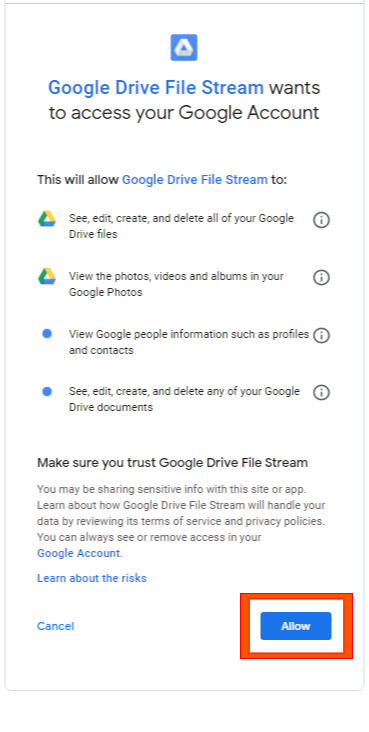

When you see this screen, click on the "Allow" button. This will take you to a screen that looks like the following:

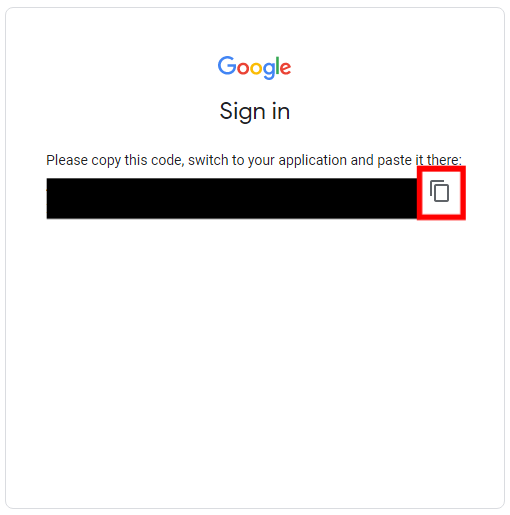

Then click on the copy button and switch back to this tab that has your Google Colaboratory open and paste it into the box that below where it says says "Enter your authorization code:" and press enter.


That's all.

In [ ]:
#@title Connect to Google Drive. Run this cell (click on the button on the top left of this cell):
# Mount Google Drive to Google Colaboratory
from google.colab import drive
drive.mount('/content/gdrive')

print("All good!")

# Images setup
Here you will create a folder for retrieving your images that you want to classify (if you don't have a dataset for images that you can classify, head over to the [Example](https://) tab on the website or to this [notebook](https://colab.research.google.com/drive/1ZfscSQPfgaPnjLtGJe9_xSui-KHY8xjf?usp=sharing)).

Create a folder inside Google Drive. Make sure that this folder is not inside another folder but rather directly in Google Drive. Then create a folder for each of the class/categories that you want to classify your images into and name your each folder as the class it represents. Then put all of your images into the respective folders.

Let's clarify this with an example. Let's say that you want to make a computer tell a cat from a dog. You can you create a folder called "cats_v_dogs" in your Google Drive. Make sure that this folder is not within a folder. Inside the "cats_v_dogs" folder, create a folder for your cat images called "cats." Again, inside the "cats_v_dogs" folder, create a folder for your dog images called "dogs." Then upload all of your cat images into your "cats" folder and upload all of your dog images into your "dogs" folder.

By now, you are done with setting your images and your file system should look like the following.

```
My Drive/
        |_cats_v_dogs/
                |_ cats/
                    |_ cat_pic1
                    |_ cat_pic2
                    |_ cat_pic3
                    |_ etc.
                |_ dogs/
                    |_ dog_pic1
                    |_ dog_pic2
                    |_ dog_pic3
                    |_ etc.
```
Now you are ready to create your model!

# Model creation and testing

In [ ]:
#@title Please type in the name of main folder (in the above example, the name would be "cats_v_dogs") and then run this cell (click on the button on the top left of this cell):

# Import necessary packages
import os
import tensorflow as tf

folder_name = "" #@param {type:"string"}

# Change working directory to the your folder.
%cd /content/gdrive/My Drive/$folder_name
# Get the current working directory
cwd = os.getcwd()

# Create and configure Datasets
batch_size = 32
img_height = 180
img_width = 180

# Training set
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    cwd,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

# Testing/validation set
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    cwd,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

# Configure dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

print("All good!")

In [ ]:
#@title Please type in the number of classes or categories that you have (if you have cats and dogs, then this number would be 2) and then run this cell (click on the button on the top left of this cell):
number_of_classes =  #@param {type:"integer"}

if number_of_classes != len(os.listdir()):
  print("Error: Please enter the number of casses or categories that you have (this number should be the number of subdirectories in your main folder):")
else:
  # Create model
  data_augmentation = tf.keras.Sequential(
      [
       tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
       tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
      ]
  )

  def model(input_shape, number_of_classes):
      inputs = tf.keras.Input(shape=input_shape)
      x = data_augmentation(inputs)
      x = tf.keras.layers.experimental.preprocessing.Rescaling(1.0 / 255)(x)
      x = tf.keras.layers.Conv2D(32, 3, strides=2, padding="same")(x)
      x = tf.keras.layers.BatchNormalization()(x)
      x = tf.keras.layers.Activation("relu")(x)
      x = tf.keras.layers.Conv2D(64, 3, padding="same")(x)
      x = tf.keras.layers.BatchNormalization()(x)
      x = tf.keras.layers.Activation("relu")(x)
      previous_block_activation = x
      for size in [128, 256, 512, 728]:
          x = tf.keras.layers.Activation("relu")(x)
          x = tf.keras.layers.SeparableConv2D(size, 3, padding="same")(x)
          x = tf.keras.layers.BatchNormalization()(x)
          x = tf.keras.layers.Activation("relu")(x)
          x = tf.keras.layers.SeparableConv2D(size, 3, padding="same")(x)
          x = tf.keras.layers.BatchNormalization()(x)
          x = tf.keras.layers.MaxPooling2D(3, strides=2, padding="same")(x)
          residual = tf.keras.layers.Conv2D(size, 1, strides=2, padding="same")(
              previous_block_activation
          )
          x = tf.keras.layers.add([x, residual])
          previous_block_activation = x
      x = tf.keras.layers.SeparableConv2D(1024, 3, padding="same")(x)
      x = tf.keras.layers.BatchNormalization()(x)
      x = tf.keras.layers.Activation("relu")(x)
      x = tf.keras.layers.GlobalAveragePooling2D()(x)
      if number_of_classes == 2:
          activation = "sigmoid"
          units = 1
      else:
          activation = "softmax"
          units = number_of_classes
      x = tf.keras.layers.Dropout(0.5)(x)
      outputs = tf.keras.layers.Dense(units, activation=activation)(x)
      return tf.keras.Model(inputs, outputs)
  model = model(input_shape=(img_height, img_width) + (3,), number_of_classes=2)

  print("All good!")

In [ ]:
#@title Please enter the number of times you want your model to be trained (too small of a number would make a poorly performing model and too large of a number would take too long to train; 15 is a good number) and then run this cell (click on the button on the top left of this cell):
number_of_epochs = 15#@param {type:"integer"}

# Compile, fit, and test model
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

model.fit(
    train_ds, epochs=number_of_epochs, validation_data=val_ds,
)

# Now look at the number on the right next to the last "val_accuracy." That is the performance of your model. Multiple that number by 100. Your model classifies correctly that percent of the time!